<a href="https://colab.research.google.com/github/Magaton1010/Python_Analysis/blob/main/sampling_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from google

In [4]:
from google.colab import files
uploaded = files.upload()

Saving NHANES.csv to NHANES.csv


In [7]:
#reading data into a Pandas dataframe
da=pd.read_csv('NHANES.csv')

# Sampling distribution of the mean

Sampling distributions describe how the value of a statistic computed from data varies when repeated samples of data are obtained. This can be explored using tools from theoretical statistics, or by using a computer to simulate data repeatedly from a hypothetical population. When working with non-simulated data (i.e. from a study like NHANES), we usually do not have the ability to explicitly obtain an "independent copy" of the sample to actually "see" its sampling distribution. However we can "subsample" from a dataset to mimic what would happen if we were to sample repeatedly from the population that produced it. A subsample is a random sample drawn from a larger data set, containing only a fraction of its observations.

In the notebook cell below, we repeatedly subsample two disjoint subsets of size 100 from the NHANES data, calculate the mean systolic blood pressure within each of these two subsets, then calculate the difference between these two means. This difference reflects the "chance variation" that would have been observed if the NHANES project had only had the resources to sample 100 participants for their study. By sampling two subsets of size 100 and comparing the resulting calculated means, we can see how the findings of two researchers independently studying the same population might differ from each other by chance.

The subsampling process described above is then repeated 1000 times, so we can see how two samples of size 100 from the NHANES population tend to differ in terms of their mean systolic blood pressure.


In [8]:
m = 100 # Subsample size
sbp_diff = [] # Storage for our subsample mean differences

for i in range(1000):
    dx = da.sample(2*m)  # We need two subsamples of size m
    dx1 = dx.iloc[0:m, :]  # First subsample
    dx2 = dx.iloc[m:, :]  # Second subsample
    sbp_diff.append(dx1.BPXSY1.mean() - dx2.BPXSY1.mean())  # The difference of mean BPXSY1 values

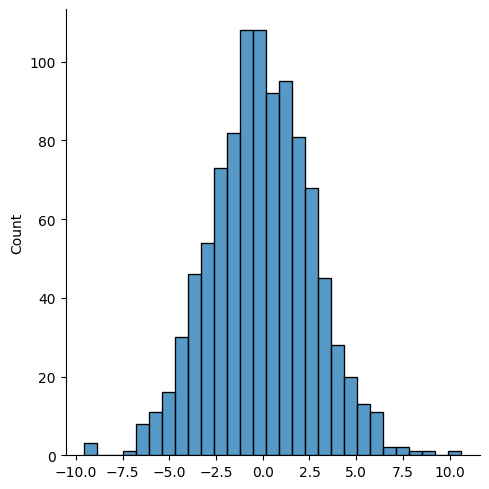

In [9]:
sns.displot(sbp_diff)

In [10]:
pd.Series(sbp_diff).describe()

,0
count,1000.000000
mean,-0.034641
std,2.692535
min,-9.548840
25%,-1.812765
50%,-0.106141
75%,1.746316
max,10.622066


The sample size is a major determinant of the chance fluctuations in any statistic. Above we used samples of size 100, below we perform the same analysis using samples of size 400.

,0
count,1000.000000
mean,-0.046098
std,1.382176
min,-4.872898
25%,-0.932562
50%,-0.058049
75%,0.896964
max,4.475638


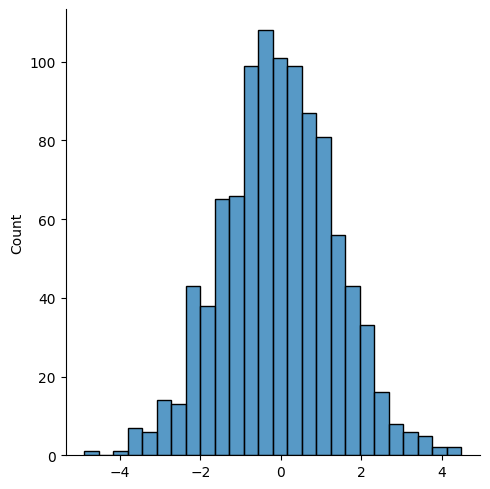

In [11]:
m = 400  # Change the sample size, everything else below is unchanged from the cells above
sbp_diff = []

for i in range(1000):
    dx = da.sample(2*m)
    dx1 = dx.iloc[0:m, :]
    dx2 = dx.iloc[m:, :]
    sbp_diff.append(dx1.BPXSY1.mean() - dx2.BPXSY1.mean())

sns.displot(sbp_diff)
pd.Series(sbp_diff).describe()

Importantly, increasing the sample size by a factor of 4 (from 100 to 400) led to a reduction of the standard deviation by a factor of 2. This scaling behavior is very common in statistics -- increasing the sample size by a factor of K leads to a reduction in the standard deviation by a factor of sqrt(K). Thus, for a factor of 4 increase in the sample size we see a factor of 2 reduction in standard deviation. Similarly, for a factor of 9 increase in the sample size we would typically see a factor of 3 reduction in the standard deviation.

# Sampling distribution of the correlation coefficien

many statistics that are more complex than the sample mean behave similarly to the mean in terms of their sampling behavior. Below we modify the subsampling analysis from above to consider the Pearson correlation coefficient between systolic and diastolic blood pressure. Note that the standard deviation still drops by approximately a factor of 2 when the sample size increases by a factor of four (from 100 to 400).

This short Python program uses nested for loops. The outer loop manages the sample size, and the inner loop obtains 1000 subsamples at a given sample size, calculates correlation coefficients for two subsamples, and records their difference.

In [12]:
for m in 100, 400:  # m is the subsample size
    sbp_diff = [] # calculate correlation coefficients from independent samples of size m
    for i in range(1000):
        dx = da.sample(2*m)
        dx1 = dx.iloc[0:m, :]
        dx2 = dx.iloc[m:, :]
        r1 = dx1.loc[:, ["BPXSY1", "BPXDI1"]].corr().iloc[0,1]
        r2 = dx2.loc[:, ["BPXSY1", "BPXDI1"]].corr().iloc[0,1]
        sbp_diff.append(r1 - r2)
    print("m=%d" % m, np.std(sbp_diff), np.sqrt(2 / m))

m=100 0.17533051464220753 0.1414213562373095
m=400 0.09010525541428283 0.07071067811865475


The simulation above shows that when the subsample size increases from 100 to 400 (a factor of 4), the standard deviation of the difference between two correlation coefficients decreases by roughly a factor of 2. The mathematical expression sqrt(2 / m) is an approximation to this standard deviation that can be computed without access to any data.

# The shape of sampling distributions

Here we focus instead on the shape of the distribution of statistics calculated on subsamples. The central limit theorem implies that many (but not all) statistics have approximately normal sampling distributions, even if the underlying data are not close to being normally distributed

illustrating this phenomenon using the systolic blood pressure data from the NHANES study. First using a histogram to look at the distribution of individual systolic blood pressure values. Note that it is somewhat right-skewed.

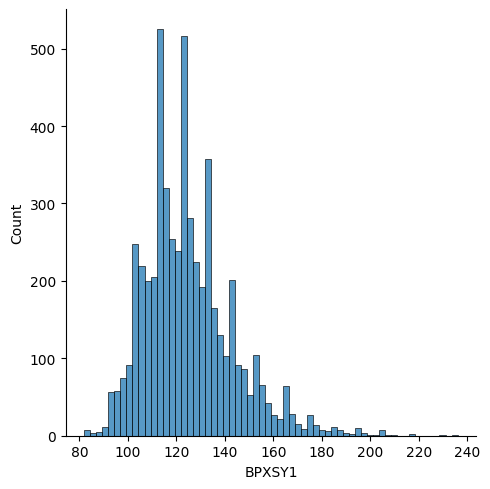

In [13]:
sns.displot(da.BPXSY1.dropna())

**1000 sample means from 1000 subsamples of size 50 and inspect their distribution.**

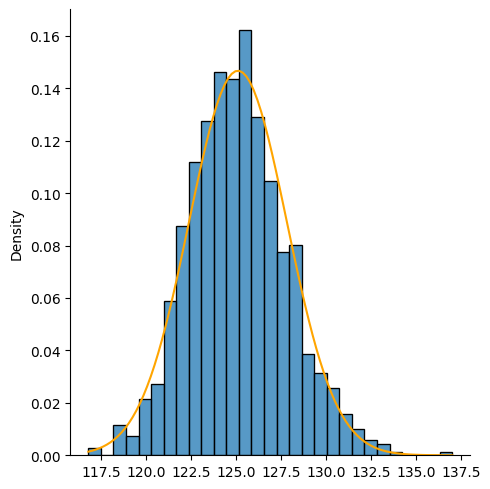

In [14]:
m = 50
sbp_mean = []
for i in range(1000):
    dx = da.sample(m)
    sbp_mean.append(dx.BPXSY1.dropna().mean())
d = sns.displot(sbp_mean, stat="density")

# The lines below plot the density of a normal approximation to the data generated above
x = np.linspace(np.min(sbp_mean), np.max(sbp_mean), 100)
from scipy.stats.distributions import norm
y = norm.pdf(x, np.mean(sbp_mean), np.std(sbp_mean))
plt.plot(x, y, color='orange')

The plots above show that while the distribution of individual systolic blood pressure measures is somewhat skewed to the right, the distribution of means of size 50 is approximately symmetric. The distribution of means is also approximately normal, as shown by the orange curve, which is the best-fitting normal approximation to the data